In [1]:
import pandas as pd

In [2]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
import glob
import cv2

In [3]:
res= pd.read_csv("submission.csv")

In [4]:
ground=res['grd']
predicted=res['prediction']

In [5]:
def generate_img(text,img_width=256,img_height=64,img_color='white'):
    img_size=(img_width,img_height)
    img = Image.new('RGB', img_size, color = img_color)
    d = ImageDraw.Draw(img)
    font = ImageFont.truetype('arial.ttf', 15) 
    d.text((10,10), text, font = font,fill=(0,0,0))
    #img = np.array(img)
    #kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    #img = cv2.filter2D(img, -1, kernel)
    return img

In [7]:
im_main="ground/"
for i in range(len(ground)):
    img_path=im_main+str(i)+'.jpg'
    text=ground[i]
    img=generate_img(text)
    img.save(img_path)
    if i%100==0:
        print(i)

0
100


In [8]:
im_main="pred/"
for i in range(len(ground)):
    img_path=im_main+str(i)+'.jpg'
    text=predicted[i]
    img=generate_img(text)
    img.save(img_path)
    if i%100==0:
        print(i)

0
100


In [43]:
filenames = glob.glob("ground//*.jpg")
filenames.sort()
grd_img = [cv2.imread(img) for img in filenames]

In [44]:
filenames = glob.glob("pred//*.jpg")
filenames.sort()
pred_img = [cv2.imread(img) for img in filenames]

In [ ]:
for i in range(len(grd_img)):
    grd_img[i]=grd_img[i]/255

In [45]:
import math
import tensorflow as tf
from keras import backend as K
def ssim_val(original_image, generated_image):
    
    original_image = tf.convert_to_tensor(original_image, dtype = tf.float32)
    generated_image = tf.convert_to_tensor(generated_image, dtype = tf.float32)
    
    ssim = tf.image.ssim(original_image, generated_image, max_val = 1.0, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, )
    
    return ssim

def PSNR(y_true, y_pred):
    max_pixel = 1.0
    return (10.0 * K.log((max_pixel ** 2) / (K.mean(K.square(y_pred - y_true), axis=-1)))) / 2.303


In [50]:
from skimage import measure

In [52]:
ssi=0
for i in range(len(grd_img)):
    ssi+=measure.compare_ssim(grd_img[i],pred_img[i], multichannel=True)
z=ssi/len(grd_img)

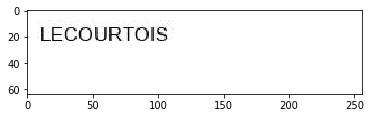

In [54]:
plt.imshow(grd_img[3])

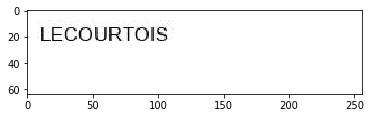

In [55]:
plt.imshow(pred_img[3])

In [56]:
print("Average_ssim::::",z)

Average_ssim:::: 0.9641357859260319
